
# **Project Name**    - Australian weather for Rain Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

### Problem Statement: -

Design a machine learning model to predict whether it will rain the next day in Australia. Using historical weather data, the model should accurately classify the target variable "RainTomorrow" (Yes/No) based on features such as temperature, humidity, wind speed, cloud cover, atmospheric pressure, and rainfall from the current day. The goal is to help improve weather forecasting accuracy, providing timely information for agricultural planning, daily activities, and safety measures.

### Key objectives include:

1. Handling missing data and ensuring data Equality.
2. Balancing the dataset if the target variable is imbalanced.
3. Evaluating model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
4. Fine-tuning the model for optimal performance and generalizability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\python.practice\dataset_practice\weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [4]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[5 rows x 24 columns]

## Exploratory Data Analysis and Visualization

In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [9]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [10]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [11]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

#### Analysing Data

In [12]:
px.histogram(df,x='Location', title='Location vs Rainy Days', color = 'RainToday')

In [13]:
px.histogram(df ,x='Temp3pm',title='Temprature at 3pm vs Rain Tomorrow',color='RainTomorrow')

In [14]:
px.histogram(df,x= 'RainTomorrow', title='Rain Tomorrow vs Rain Today',color='RainToday')

In [15]:
px.scatter(df.sample(2000),title='Min Temp vs Max Temp', x ='MinTemp',y='MaxTemp',color='RainToday')

In [16]:
px.strip(df.sample(2000),title="Temp (3pm) vs. Humidity (3pm)",x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

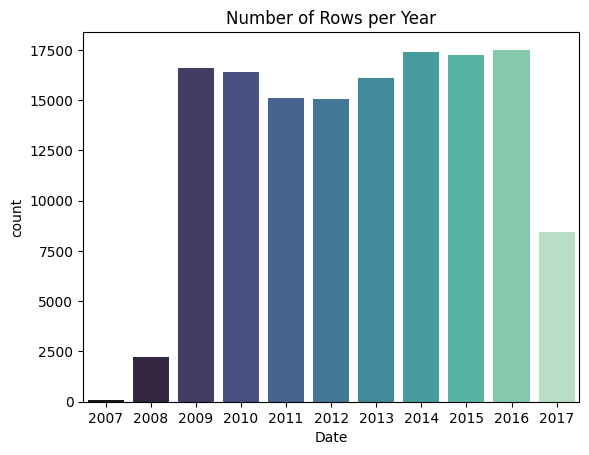

In [17]:
plt.title('Number of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year,palette='mako')
plt.show()

**Handling missing values is a crucial step in data preprocessing, especially when working with predictive modeling or machine learning tasks. Missing data can introduce bias, reduce the effectiveness of models, and lead to inaccurate predictions**

#### Filling Null

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.Date.value_counts()

Date
2013-03-07    49
2013-03-06    49
2013-04-14    49
2013-04-03    49
2013-04-21    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

In [21]:
df.drop(columns={'Date','RISK_MM'},axis=1,inplace=True)

In [22]:
df.isnull().sum()[df.isnull().sum()>0]

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

In [23]:
df.isnull().sum()[df.isnull().sum()>0] / df.shape[0] * 100

MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
dtype: float64

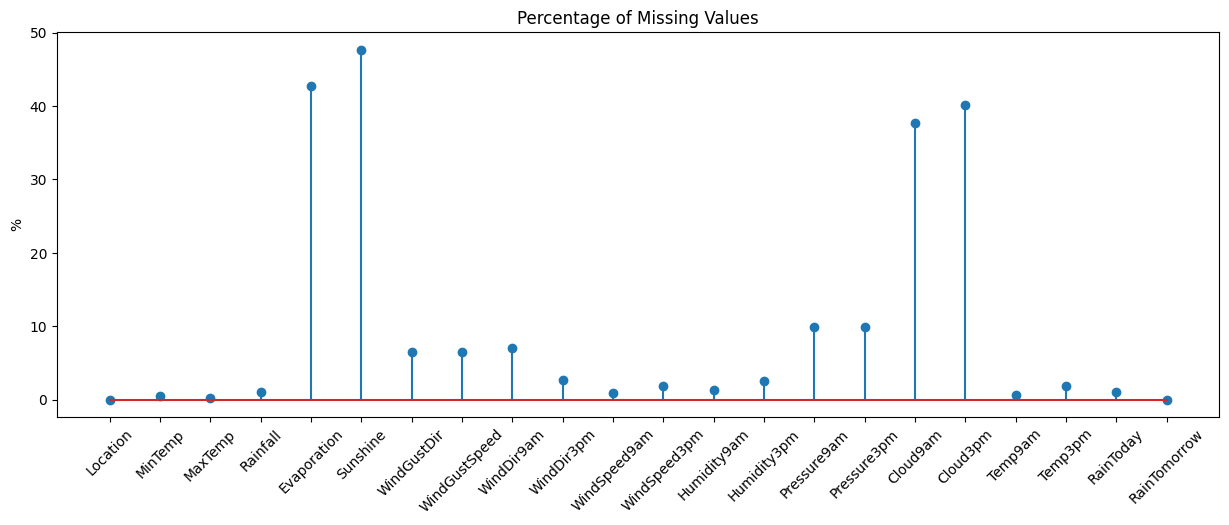

In [24]:
missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

In [25]:
df.RainToday.value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [26]:
df.Rainfall.fillna(df.Rainfall.mean(), inplace=True)
df.Sunshine.fillna(df.Sunshine.mean(), inplace=True)
df.RainToday.fillna('No', inplace=True)

In [27]:
df.WindGustDir.fillna("W",inplace=True)
df.WindGustSpeed.fillna(df.WindGustSpeed.mean(),inplace=True)
df.WindDir9am.fillna("N",inplace=True)
df.WindDir3pm.fillna("SE",inplace=True)
df.WindSpeed9am.fillna(df.WindSpeed9am.mean(),inplace=True)
df.WindSpeed3pm.fillna(df.WindSpeed3pm.mean(),inplace=True)
df.Humidity9am.fillna(df.Humidity9am.mean(),inplace=True)
df.Humidity3pm.fillna(df.Humidity3pm.mean(),inplace=True)
df.Pressure9am.fillna(df.Pressure9am.mean(),inplace=True)
df.Pressure3pm.fillna(df.Pressure3pm.mean(),inplace=True)
df.Cloud9am.fillna(df.Cloud9am.mean(),inplace=True)
df.Cloud3pm.fillna(df.Cloud3pm.mean(),inplace=True)
df.Temp9am.fillna(df.Temp9am.mean(),inplace=True)
df.Temp3pm.fillna(df.Temp3pm.mean(),inplace=True)
df.MinTemp.fillna(df.MinTemp.mean(),inplace=True)
df.MaxTemp.fillna(df.MaxTemp.mean(),inplace=True)
df.Evaporation.fillna(df.Evaporation.mean(),inplace=True)

In [28]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

#### Non-Numeric to Numeric

In [29]:
for i in df.dtypes.index[df.dtypes == 'object']:
    a = df[i].value_counts()
    print(f'column: {i}')
    print(a)
    print("****"*8)

column: Location
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929

In [30]:
df.select_dtypes(include='object').columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [31]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [32]:
df.select_dtypes(exclude= 'object')

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0              2     13.4     22.9       0.6     5.469824  7.624853   
1              2      7.4     25.1       0.0     5.469824  7.624853   
2              2     12.9     25.7       0.0     5.469824  7.624853   
3              2      9.2     28.0       0.0     5.469824  7.624853   
4              2     17.5     32.3       1.0     5.469824  7.624853   
...          ...      ...      ...       ...          ...       ...   
142188        41      3.5     21.8       0.0     5.469824  7.624853   
142189        41      2.8     23.4       0.0     5.469824  7.624853   
142190        41      3.6     25.3       0.0     5.469824  7.624853   
142191        41      5.4     26.9       0.0     5.469824  7.624853   
142192        41      7.8     27.0       0.0     5.469824  7.624853   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0                13           44.0          13          14  ...         71.0   
1                14           44.0           6          15  ...         44.0   
2                15           46.0          13          15  ...         38.0   
3                 4           24.0           9           0  ...         45.0   
4                13           41.0           1           7  ...         82.0   
...             ...            ...         ...         ...  ...          ...   
142188            0           31.0           2           0  ...         59.0   
142189            0           31.0           9           1  ...         51.0   
142190            6           22.0           9           3  ...         56.0   
142191            3           37.0           9          14  ...         53.0   
142192            9           28.0          10           3  ...         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1  8.000000  4.503167     16.9   
1              25.0       1010.6       1007.8  4.437189  4.503167     17.2   
2              30.0       1007.6       1008.7  4.437189  2.000000     21.0   
3              16.0       1017.6       1012.8  4.437189  4.503167     18.1   
4              33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...             ...          ...          ...       ...       ...      ...   
142188         27.0       1024.7       1021.2  4.437189  4.503167      9.4   
142189         24.0       1024.6       1020.3  4.437189  4.503167     10.1   
142190         21.0       1023.5       1019.1  4.437189  4.503167     10.9   
142191         24.0       1021.0       1016.8  4.437189  4.503167     12.5   
142192         24.0       1019.4       1016.5  3.000000  2.000000     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8          0             0  
1          24.3          0             0  
2          23.2          0             0  
3          26.5          0             0  
4          29.7          0             0  
...         ...        ...           ...  
142188     20.9          0             0  
142189     22.4          0             0  
142190     24.5          0             0  
142191     26.1          0             0  
142192     26.0          0             0  

[142193 rows x 22 columns]

In [33]:
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6     5.469824  7.624853           13   
1         2      7.4     25.1       0.0     5.469824  7.624853           14   
2         2     12.9     25.7       0.0     5.469824  7.624853           15   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          13          14  ...         71.0         22.0   
1           44.0           6          15  ...         44.0         25.0   
2           46.0          13          15  ...         38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503167     16.9     21.8          0   
1       1010.6       1007.8  4.437189  4.503167     17.2     24.3          0   
2       1007.6       1008.7  4.437189  2.000000     21.0     23.2          0   

   RainTomorrow  
0             0  
1             0  
2             0  

[3 rows x 22 columns]

## Feature Selections

In [34]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000 -0.006194 -0.020490 -0.003457     0.032114  0.002144   
MinTemp       -0.006194  1.000000  0.733919  0.103314     0.353698  0.051907   
MaxTemp       -0.020490  0.733919  1.000000 -0.074202     0.442214  0.331505   
Rainfall      -0.003457  0.103314 -0.074202  1.000000    -0.038186 -0.173011   
Evaporation    0.032114  0.353698  0.442214 -0.038186     1.000000  0.290375   
Sunshine       0.002144  0.051907  0.331505 -0.173011     0.290375  1.000000   
WindGustDir   -0.005055 -0.136321 -0.212208  0.044853    -0.069170 -0.064699   
WindGustSpeed  0.069269  0.173331  0.066329  0.127250     0.147371 -0.022479   
WindDir9am    -0.004434 -0.029635 -0.212589  0.085142    -0.064262 -0.070270   
WindDir3pm     0.008325 -0.158958 -0.181344  0.047904    -0.044358 -0.033136   
WindSpeed9am   0.077038  0.174946  0.014586  0.085977     0.140669  0.005685   
WindSpeed3pm   0.064180  0.174187  0.050381  0.056762     0.094134  0.039471   
Humidity9am   -0.002065 -0.232372 -0.499777  0.221392    -0.377594 -0.351980   
Humidity3pm    0.011066  0.005913 -0.499725  0.249609    -0.289915 -0.446849   
Pressure9am    0.036492 -0.424357 -0.309093 -0.159676    -0.211823  0.030932   
Pressure3pm    0.046345 -0.434034 -0.397422 -0.120366    -0.231341 -0.015477   
Cloud9am      -0.010908  0.061460 -0.226776  0.171613    -0.152224 -0.537714   
Cloud3pm      -0.015860  0.015902 -0.214469  0.145848    -0.147763 -0.559379   
Temp9am       -0.015596  0.897999  0.880087  0.011384     0.417323  0.210174   
Temp3pm       -0.022718  0.699828  0.969735 -0.077553     0.429195  0.349271   
RainToday     -0.004911  0.055645 -0.226474  0.500286    -0.141089 -0.238980   
RainTomorrow  -0.003579  0.083717 -0.159087  0.236874    -0.089551 -0.327029   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.005055       0.069269   -0.004434    0.008325  ...   
MinTemp          -0.136321       0.173331   -0.029635   -0.158958  ...   
MaxTemp          -0.212208       0.066329   -0.212589   -0.181344  ...   
Rainfall          0.044853       0.127250    0.085142    0.047904  ...   
Evaporation      -0.069170       0.147371   -0.064262   -0.044358  ...   
Sunshine         -0.064699      -0.022479   -0.070270   -0.033136  ...   
WindGustDir       1.000000       0.137648    0.356896    0.565814  ...   
WindGustSpeed     0.137648       1.000000    0.074660    0.136660  ...   
WindDir9am        0.356896       0.074660    1.000000    0.301298  ...   
WindDir3pm        0.565814       0.136660    0.301298    1.000000  ...   
WindSpeed9am      0.009727       0.577864    0.109955    0.050191  ...   
WindSpeed3pm      0.083963       0.658377    0.111090    0.089810  ...   
Humidity9am       0.067950      -0.209272    0.088850    0.026074  ...   
Humidity3pm       0.063939      -0.025822    0.148903   -0.007186  ...   
Pressure9am      -0.120615      -0.426600   -0.050318   -0.133629  ...   
Pressure3pm      -0.031998      -0.384642    0.039878   -0.037495  ...   
Cloud9am          0.066094       0.052281    0.086578    0.047774  ...   
Cloud3pm          0.058669       0.080202    0.054210    0.050714  ...   
Temp9am          -0.178071       0.146756   -0.115635   -0.175855  ...   
Temp3pm          -0.223669       0.032274   -0.219980   -0.192927  ...   
RainToday         0.127651       0.148244    0.168410    0.123130  ...   
RainTomorrow      0.053447       0.225264    0.035776    0.030488  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location         -0.002065     0.011066     0.036492     0.046345 -0.010908   
MinTemp          -0.232372     0.005913    -0.424357    -0.434034  0.061460   
MaxTemp          -0.499777    -0.499725    -0.309093    -0.397422 -0.226776   
Rainfall          0.221392     0.249609    -0.159676    -0.120366  0.171613   
Evaporation      -0.377594    -0.289915    -0.211823    -0.231341 -0.152224 

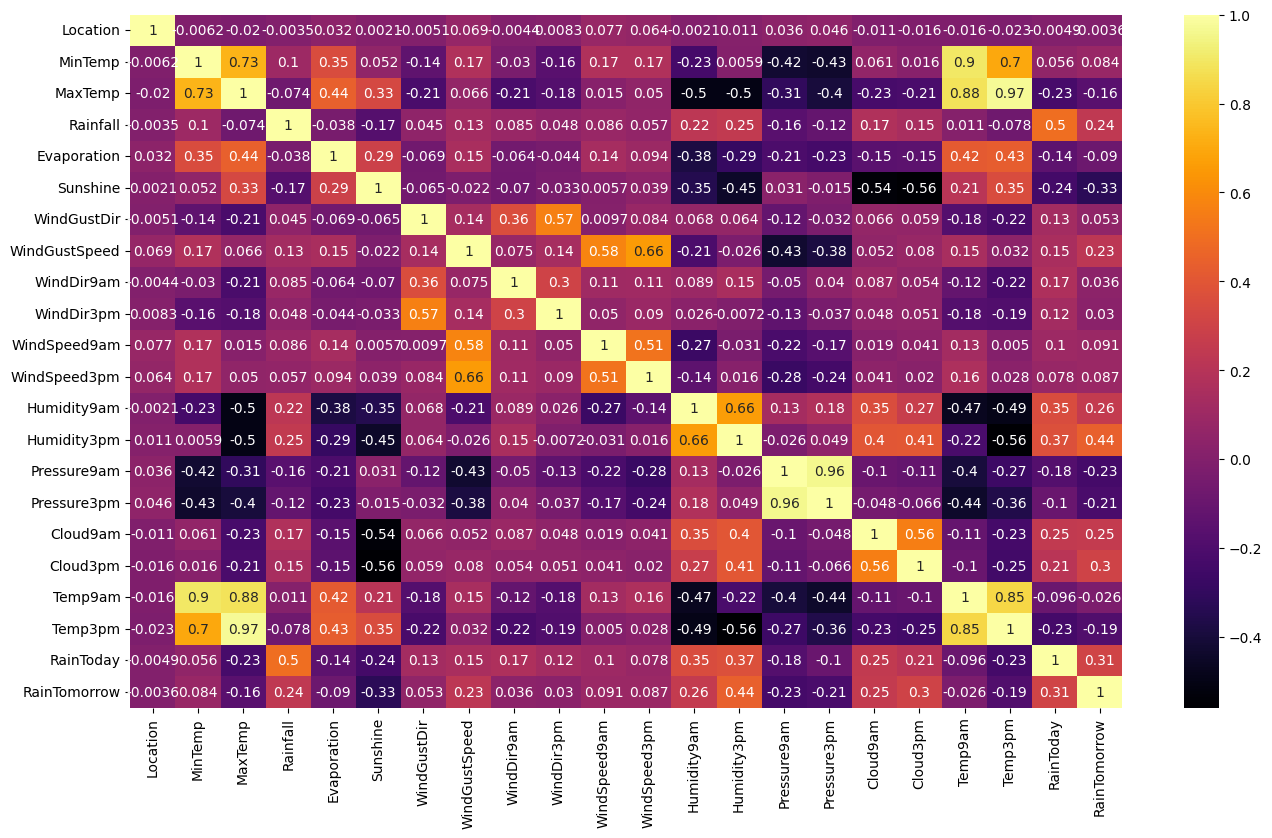

In [35]:
plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

In [36]:
from boruta import BorutaPy

In [37]:
df.head(1)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6     5.469824  7.624853           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          13          14  ...         71.0         22.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0  4.503167     16.9     21.8          0   

   RainTomorrow  
0             0  

[1 rows x 22 columns]

In [38]:
x = df.iloc[:,0:-1]
y = df['RainTomorrow']

In [39]:
x.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6     5.469824  7.624853           13   
1         2      7.4     25.1       0.0     5.469824  7.624853           14   
2         2     12.9     25.7       0.0     5.469824  7.624853           15   
3         2      9.2     28.0       0.0     5.469824  7.624853            4   
4         2     17.5     32.3       1.0     5.469824  7.624853           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          13          14  ...          24.0         71.0   
1           44.0           6          15  ...          22.0         44.0   
2           46.0          13          15  ...          26.0         38.0   
3           24.0           9           0  ...           9.0         45.0   
4           41.0           1           7  ...          20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1  8.000000  4.503167     16.9   
1         25.0       1010.6       1007.8  4.437189  4.503167     17.2   
2         30.0       1007.6       1008.7  4.437189  2.000000     21.0   
3         16.0       1017.6       1012.8  4.437189  4.503167     18.1   
4         33.0       1010.8       1006.0  7.000000  8.000000     17.8   

   Temp3pm  RainToday  
0     21.8          0  
1     24.3          0  
2     23.2          0  
3     26.5          0  
4     29.7          0  

[5 rows x 21 columns]

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [41]:
df_copy = x

df_x = np.array(x)
df_y = np.array(y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier()

In [43]:
bourta_features_selection = BorutaPy(crf,max_iter=15,verbose=2)
bourta_features_selection.fit(df_x, df_y)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	13
Tentative: 	0
Rejected: 	8


BorutaPy finished running.

Iteration: 	9 / 15
Confirmed: 	13
Tentative: 	0
Rejected: 	8


BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x1E62CDF6440),
         max_iter=15, random_state=RandomState(MT19937) at 0x1E62CDF6440,
         verbose=2)

In [44]:
l1 = bourta_features_selection.support_

In [45]:
feature_imp = pd.DataFrame()
feature_imp['feat'] = df_copy.columns
feature_imp['imp'] = l1
feature_imp = feature_imp.sort_values('imp',ascending=False)

In [46]:
feature_imp

feat    imp
20      RainToday   True
14    Pressure9am   True
2         MaxTemp   True
3        Rainfall   True
19        Temp3pm   True
5        Sunshine   True
18        Temp9am   True
7   WindGustSpeed   True
17       Cloud3pm   True
1         MinTemp   True
15    Pressure3pm   True
12    Humidity9am   True
13    Humidity3pm   True
16       Cloud9am  False
0        Location  False
11   WindSpeed3pm  False
9      WindDir3pm  False
8      WindDir9am  False
6     WindGustDir  False
4     Evaporation  False
10   WindSpeed9am  False

**Let see Which are most Importanat top 10 X or Independent variables**

In [47]:
x = df.iloc[:,0:-1]
y = df['RainTomorrow']

In [48]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

from sklearn.feature_selection import RFE

In [49]:
crf_lin = RFE(linear,n_features_to_select= 10 )

In [50]:
crf_lin.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [51]:
crf_lin.support_

array([False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True])

In [52]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = x.columns
feat_imp['important'] = crf_lin.support_ 
feat_imp[feat_imp.important == True]

Features  important
1         MinTemp       True
5        Sunshine       True
7   WindGustSpeed       True
11   WindSpeed3pm       True
13    Humidity3pm       True
14    Pressure9am       True
15    Pressure3pm       True
17       Cloud3pm       True
19        Temp3pm       True
20      RainToday       True

## Multi-Colinearity
**Variance Inflation Factor (VIF)**

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
x.values

array([[ 2. , 13.4, 22.9, ..., 16.9, 21.8,  0. ],
       [ 2. ,  7.4, 25.1, ..., 17.2, 24.3,  0. ],
       [ 2. , 12.9, 25.7, ..., 21. , 23.2,  0. ],
       ...,
       [41. ,  3.6, 25.3, ..., 10.9, 24.5,  0. ],
       [41. ,  5.4, 26.9, ..., 12.5, 26.1,  0. ],
       [41. ,  7.8, 27. , ..., 15.1, 26. ,  0. ]])

In [55]:
Variance_Inflation_Factor = []

for i in range(0 ,x.shape[1]):
    Variance_Inflation_Factor.append(variance_inflation_factor(x.values,i))

In [56]:
Variance_Inflation_Factor

[np.float64(3.830298008482135),
 np.float64(39.62968590016646),
 np.float64(262.57268848431715),
 np.float64(1.4830447441073762),
 np.float64(5.446428972781581),
 np.float64(16.18865284309642),
 np.float64(6.385531338817633),
 np.float64(22.848912944507347),
 np.float64(4.359188961880416),
 np.float64(6.316985474939846),
 np.float64(6.433007534303485),
 np.float64(10.899720794849907),
 np.float64(52.04001868120013),
 np.float64(37.60409986295629),
 np.float64(424230.88450940634),
 np.float64(423977.89361931756),
 np.float64(8.510177240779335),
 np.float64(9.89072311835147),
 np.float64(143.9173135651047),
 np.float64(253.77603951284644),
 np.float64(2.0784853817387625)]

In [57]:
vif_df = pd.DataFrame()
vif_df['Columns'] = x.columns
vif_df['Variance Inflation Factor'] = Variance_Inflation_Factor

In [58]:
vif_df

Columns  Variance Inflation Factor
0        Location                   3.830298
1         MinTemp                  39.629686
2         MaxTemp                 262.572688
3        Rainfall                   1.483045
4     Evaporation                   5.446429
5        Sunshine                  16.188653
6     WindGustDir                   6.385531
7   WindGustSpeed                  22.848913
8      WindDir9am                   4.359189
9      WindDir3pm                   6.316985
10   WindSpeed9am                   6.433008
11   WindSpeed3pm                  10.899721
12    Humidity9am                  52.040019
13    Humidity3pm                  37.604100
14    Pressure9am              424230.884509
15    Pressure3pm              423977.893619
16       Cloud9am                   8.510177
17       Cloud3pm                   9.890723
18        Temp9am                 143.917314
19        Temp3pm                 253.776040
20      RainToday                   2.078485

## Model Buliding

In [36]:
## Y variable or Target variable is ---> 'RainTomorrow'

df_train, df_test = train_test_split(df,test_size=0.25, random_state= 99)

#### Handling Imbalanced Dataset

In [37]:
df.RainTomorrow.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

Text(0.5, 1.0, 'Showing Imbalanced data')

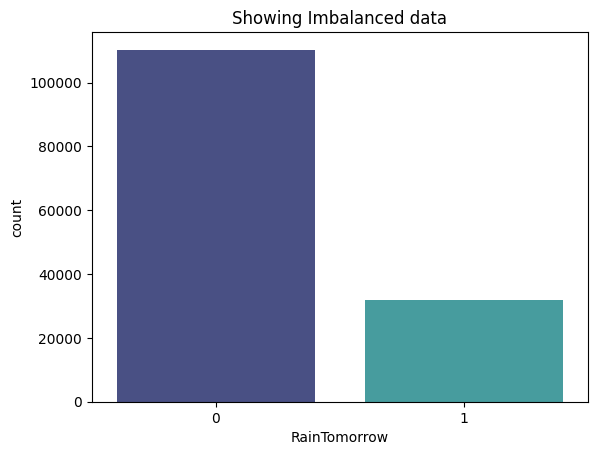

In [38]:
sns.countplot(x=df['RainTomorrow'], data=df, palette='mako')
plt.title('Showing Imbalanced data')

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [41]:
sm=SMOTE()
x_new, y_new = sm.fit_resample(X, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

Before Using SMOTE, counts of label '1': 31877
Before Using SMOTE, counts of label '0': 110316 

After Using SMOTE, counts of label '1': 110316
After Using SMOTE, counts of label '0': 110316 





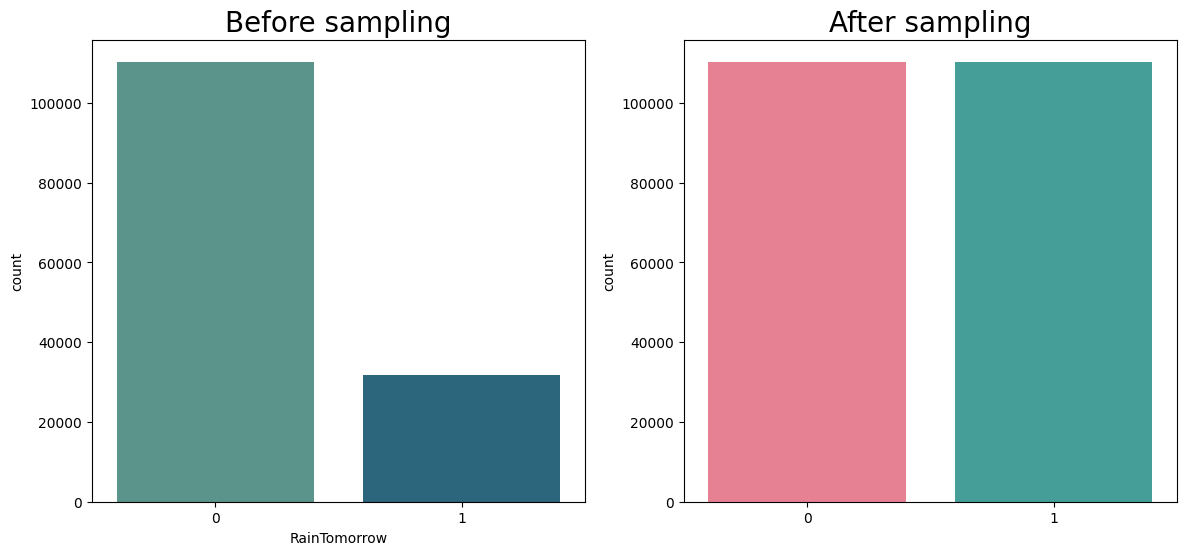

In [42]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['RainTomorrow'], data=df, palette='crest')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x= y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

#### Spilt dataset of X variable and Y variable

In [43]:
df_train_x,df_test_x ,df_train_y, df_test_y= train_test_split(x_new,y_new, test_size= 0.20 , random_state=101)

**Building Models**

We are going to use 7 models in this project for enhanced learning and selecting best model for dataset. As all them are not necessary but to evaluate their accuracy and possible predictive models. 7 models we will building are as follows: - 

1. Logistic Regression 
2. Decision Tree
3. Random Forest Classifier
4. KNN Model
5. AdaBoost
7. XGBoost 
7. Bagging Classifier 

## 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [62]:
logistic.fit(df_train_x,df_train_y)

LogisticRegression()

In [63]:
pred_test_logistic = logistic.predict(df_test_x)

In [64]:
conf_log = confusion_matrix(df_test_y,pred_test_logistic)
conf_log

array([[17078,  4908],
       [ 5208, 16933]])

In [65]:
acc_logistic = accuracy_score(df_test_y, pred_test_logistic)
acc_logistic

0.7707526004487049

In [66]:
Accuarcy_logistic = accuracy_score(df_test_y,pred_test_logistic)

In [67]:
print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     21986
           1       0.78      0.76      0.77     22141

    accuracy                           0.77     44127
   macro avg       0.77      0.77      0.77     44127
weighted avg       0.77      0.77      0.77     44127



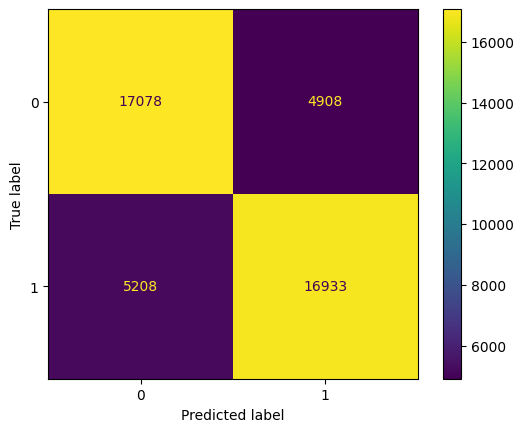

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_logistic))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [69]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)[:,1]

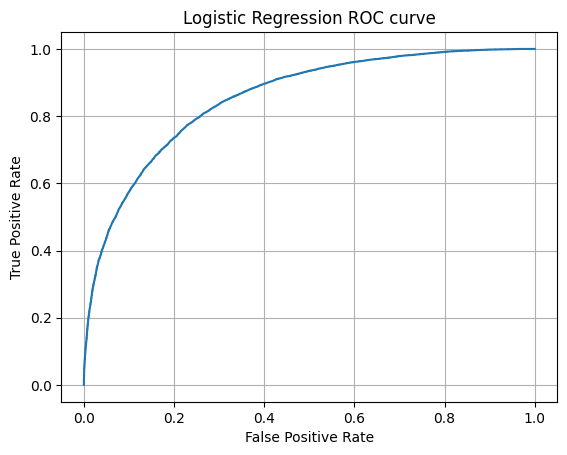

In [70]:
fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.grid()
plt.show()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 76%**, meaning that it correctly classified 76% of the instances in the training set. **The precision for class 1 is 78%**, meaning that when the model predicted a class 1 Not good, it was correct 78% of the time. **The recall for class 1 is 75%**, meaning that the model correctly identified 75% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 77%**.

###  Hyperparameter Tuning for Logistic

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [57]:
Cv_score = cross_val_score(logistic,df_train_x,df_train_y, cv = 10,scoring = 'accuracy')
print("cv_score accuracy: ", Cv_score)
print('------'*9)
print("cv score mean accuracy: ", Cv_score.mean())

cv_score accuracy:  [0.77083451 0.77474364 0.76885162 0.77106113 0.77111778 0.77444759
 0.77512748 0.778017   0.77195467 0.77427762]
------------------------------------------------------
cv score mean accuracy:  0.7730433053331971


In [58]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logistic = GridSearchCV(logistic, param_grid, cv=5)

In [59]:
grid_logistic.fit(df_train_x , df_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [60]:
pred_test_log_grid = grid_logistic.predict(df_test_x)

In [61]:
print(classification_report(df_test_y , pred_test_log_grid))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     21986
           1       0.78      0.76      0.77     22141

    accuracy                           0.77     44127
   macro avg       0.77      0.77      0.77     44127
weighted avg       0.77      0.77      0.77     44127



In [62]:
print("Best cross-validation score:", grid_logistic.best_score_)
print("Best parameters:", grid_logistic.best_params_)

Best cross-validation score: 0.7731848956120224
Best parameters: {'C': 1}


Looking after Hyperparameter Tuning for Logistic at the evaluation metric scores, we can see that the model has an **overall accuracy of 77%**, meaning that it correctly classified 77% of the instances in the training set. **The precision for class 1 is 78%**, meaning that when the model predicted a class 1 Not good, it was correct 78% of the time. **The recall for class 1 is 75%**, meaning that the model correctly identified 75% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 77%**.


#### We did not see any improvement here.

## 2. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [73]:
dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [74]:
pred_test_decision = dec.predict(df_test_x)

In [75]:
conf_dec = confusion_matrix(df_test_y,pred_test_decision)
conf_dec

array([[18302,  3684],
       [ 3402, 18739]])

In [76]:
Accuarcy_dec = accuracy_score(df_test_y,pred_test_decision)
Accuarcy_dec

0.8394180433748045

In [77]:
print(classification_report(df_test_y,pred_test_decision))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     21986
           1       0.84      0.85      0.84     22141

    accuracy                           0.84     44127
   macro avg       0.84      0.84      0.84     44127
weighted avg       0.84      0.84      0.84     44127



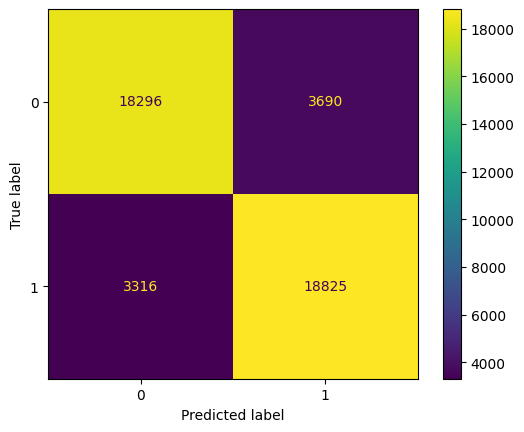

In [69]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_decision))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [70]:
depth = dec.tree_.max_depth
print("Depth of dtree1, Decision Tree is: ",depth)

Depth of dtree1, Decision Tree is:  42


In [71]:
l1 = dec.feature_importances_
l1

array([0.02349389, 0.02626444, 0.02384298, 0.1698066 , 0.01877792,
       0.04951464, 0.01958167, 0.05117282, 0.01849466, 0.0203302 ,
       0.0237398 , 0.02506236, 0.03326837, 0.26845966, 0.02497341,
       0.05314866, 0.02991932, 0.06178274, 0.02420776, 0.0242544 ,
       0.00990371])

In [72]:
Feature_important = pd.DataFrame()
Feature_important['Features'] = df_train_x.columns
Feature_important['IMP'] = l1
Feature_important

Features       IMP
0        Location  0.023494
1         MinTemp  0.026264
2         MaxTemp  0.023843
3        Rainfall  0.169807
4     Evaporation  0.018778
5        Sunshine  0.049515
6     WindGustDir  0.019582
7   WindGustSpeed  0.051173
8      WindDir9am  0.018495
9      WindDir3pm  0.020330
10   WindSpeed9am  0.023740
11   WindSpeed3pm  0.025062
12    Humidity9am  0.033268
13    Humidity3pm  0.268460
14    Pressure9am  0.024973
15    Pressure3pm  0.053149
16       Cloud9am  0.029919
17       Cloud3pm  0.061783
18        Temp9am  0.024208
19        Temp3pm  0.024254
20      RainToday  0.009904

The ML model used is Decision Tree for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.84**, which means that 84% of the predictions made by the model are correct. **The precision for class 1 is 0.84**, which means that out of all the positive predictions made for class 1, 84% of them are actually correct. **The recall for class 1 is 0.85**, which means that out of all the actual positive instances of class 1, the model correctly identified 85% of them. **The F1-score for class 1 is 0.84**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### Hyperparameter Tuning of Decision Tree

In [73]:
Decision_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split':[25,50,75,100]
}

In [74]:
grid = GridSearchCV(dec, Decision_grid)

In [75]:
grid.fit(df_train_x , df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 20],
                         'min_samples_split': [25, 50, 75, 100]})

In [76]:
grid_predict_decision = grid.predict(df_test_x)
confusion_matrix(df_test_y , grid_predict_decision)

array([[19176,  2810],
       [ 3656, 18485]])

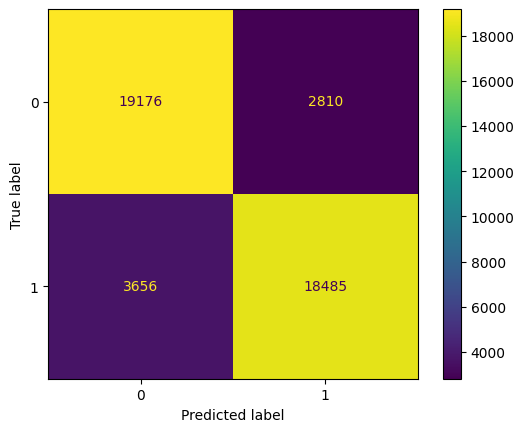

In [77]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, grid_predict_decision))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [78]:
print(classification_report(df_test_y,grid_predict_decision ))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     21986
           1       0.87      0.83      0.85     22141

    accuracy                           0.85     44127
   macro avg       0.85      0.85      0.85     44127
weighted avg       0.85      0.85      0.85     44127



Looking after Hyperparameter Tuning for Random Forest at the evaluation metric scores, we can see that the model has an **overall accuracy of 85%**, meaning that it correctly classified 85% of the instances in the training set. **The precision for class 1 is 86%**, meaning that when the model predicted a class 1 Not good, it was correct 86% of the time. **The recall for class 1 is 83%**, meaning that the model correctly identified 83 % of the actual class 1 instances in the dataset. **The F1-score for class 1 is 85%**.


#### We see slightly difference after Hyper Parameter but not much difference showing.

## 3. Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()

In [55]:
Random.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [56]:
pred_test_Random = Random.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Random)

array([[19849,  2137],
       [ 1988, 20153]])

In [57]:
acc_crf = accuracy_score(df_test_y, pred_test_Random)

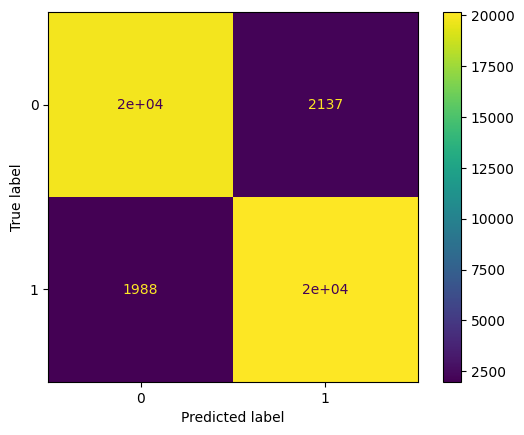

In [58]:
c_matrix_random = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_Random))
c_matrix_random.plot(cmap = plt.cm.viridis)
plt.show()

In [59]:
print(classification_report(df_test_y , pred_test_Random))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     21986
           1       0.90      0.91      0.91     22141

    accuracy                           0.91     44127
   macro avg       0.91      0.91      0.91     44127
weighted avg       0.91      0.91      0.91     44127



The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.91**, which means that 91 % of the predictions made by the model are correct. **The precision for class 1 is 0.90**, which means that out of all the positive predictions made for class 1, 90 % of them are actually correct. **The recall for class 1 is 0.91**, which means that out of all the actual positive instances of class 1, the model correctly identified 91 % of them. **The F1-score for class 1 is 0.91**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### Hyperparameter Tuning of Rnadom Forest

In [84]:
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clsr.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [86]:
pred_test_Random_hyper = clsr.predict(df_test_x)

In [87]:
confusion_matrix(df_test_y , pred_test_Random_hyper)

array([[17687,  4299],
       [ 4072, 18069]])

In [88]:
print(classification_report(df_test_y , pred_test_Random_hyper))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     21986
           1       0.81      0.82      0.81     22141

    accuracy                           0.81     44127
   macro avg       0.81      0.81      0.81     44127
weighted avg       0.81      0.81      0.81     44127



#### We saying after Hyperparameter Tuning of Rnadom Forest model that model performing poor performance comparing the without hyperparameter

## 4. K-Nearest Neighbors (KNN)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(df_train_x,df_train_y)
    y_pred_test_knn = knn.predict(df_test_x)
    error_rate.append(1 - accuracy_score(df_test_y,y_pred_test_knn))

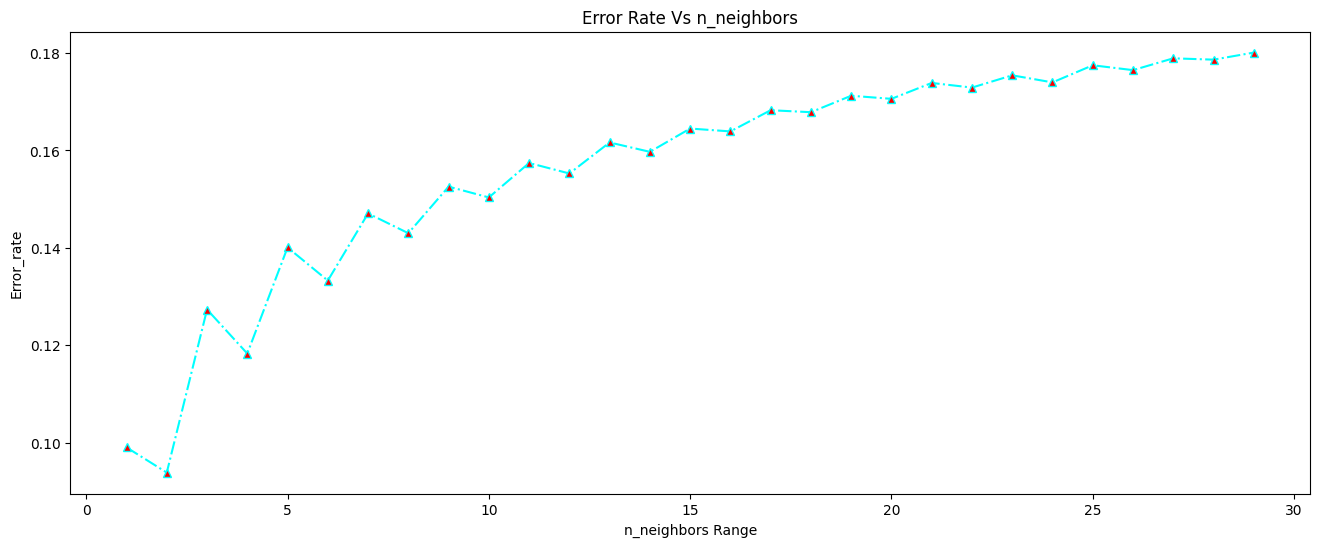

In [86]:
# Let's Visualize all error Rates

plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate, color='cyan', marker = '^', linestyle = '-.', markerfacecolor = 'red' )
plt.title("Error Rate Vs n_neighbors")
plt.xlabel("n_neighbors Range")
plt.ylabel("Error_rate")
plt.show()

**As we can see in above visualization the best n_neighbors =1, which shows us that only single dataset is providing the best performance. But, n_neighbors = 1 can lead to problem low bias and high variance. To solve this problem we have to do trade off between bian and variance we will choose next n_neighbors which can solve problem of this sensitivity and will imporove performance of our model.**


In [87]:
knn = KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [88]:
pred_test_knn = knn.predict(df_test_x)

In [89]:
conf_knn = confusion_matrix(df_test_y , pred_test_knn)
conf_knn

array([[16665,  5321],
       [  859, 21282]])

In [90]:
acc_knn = accuracy_score(df_test_y, pred_test_knn)

In [91]:
print(classification_report(df_test_y, pred_test_knn))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     21986
           1       0.80      0.96      0.87     22141

    accuracy                           0.86     44127
   macro avg       0.88      0.86      0.86     44127
weighted avg       0.88      0.86      0.86     44127



The ML model used is K-Nearest Neighbors for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.86**, which means that 86% of the predictions made by the model are correct. **The precision for class 1 is 0.80**, which means that out of all the positive predictions made for class 1, 80 % of them are actually correct. **The recall for class 1 is 0.96**, which means that out of all the actual positive instances of class 1, the model correctly identified 96 % of them. **The F1-score for class 1 is 0.87**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## 5. AdaBoost

**AdaBoost for Decision Tree model**

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(dec)

ada.fit(df_train_x, df_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [80]:
pred_test_ada = ada.predict(df_test_x)

confusion_matrix(df_test_y, pred_test_ada)

array([[18297,  3689],
       [ 3288, 18853]])

In [81]:
acc_ada = accuracy_score(df_test_y, pred_test_ada)

In [82]:
print(classification_report(df_test_y , pred_test_ada))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     21986
           1       0.84      0.85      0.84     22141

    accuracy                           0.84     44127
   macro avg       0.84      0.84      0.84     44127
weighted avg       0.84      0.84      0.84     44127



## 6. XGBoost Model

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
pred_test_Xgboost = xgb.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Xgboost)

array([[20509,  1477],
       [ 2723, 19418]])

In [51]:
acc_xgboost = accuracy_score(df_test_y, pred_test_Xgboost)

In [52]:
print(classification_report(df_test_y , pred_test_Xgboost))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     21986
           1       0.93      0.88      0.90     22141

    accuracy                           0.90     44127
   macro avg       0.91      0.90      0.90     44127
weighted avg       0.91      0.90      0.90     44127



The ML model used is XGBoost for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.90**, which means that 90% of the predictions made by the model are correct. **The precision for class 1 is 0.93**, which means that out of all the positive predictions made for class 1, 93 % of them are actually correct. **The recall for class 1 is 0.88**, which means that out of all the actual positive instances of class 1, the model correctly identified 88 % of them. **The F1-score for class 1 is 0.90**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

## 7. Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifierS
bgg = BaggingClassifier()

bgg.fit(df_train_x, df_train_y)

BaggingClassifier()

In [45]:
pred_test_bagging = bgg.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_bagging)

array([[20097,  1889],
       [ 3010, 19131]])

In [46]:
acc_bagging = accuracy_score(df_test_y, pred_test_bagging)

In [47]:
print(classification_report(df_test_y , pred_test_bagging))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     21986
           1       0.91      0.86      0.89     22141

    accuracy                           0.89     44127
   macro avg       0.89      0.89      0.89     44127
weighted avg       0.89      0.89      0.89     44127



In [48]:
cv_score = cross_val_score(bgg, df_train_x, df_train_y , cv = 5, scoring = 'accuracy')
print("CV Score: ", cv_score)
print("------"*9)
print("CV mean score: ", cv_score.mean())

CV Score:  [0.8873403  0.8830628  0.88396929 0.88493244 0.88360103]
------------------------------------------------------
CV mean score:  0.8845811733378657


## Final Model

In [92]:
list_final_model = ['logistic', 'dec','Random','ada', 'xgb','bgg','knn']


list_final_acc_test_model  = [acc_logistic, Accuarcy_dec, acc_crf, acc_ada, acc_xgboost, acc_bagging 
                              , acc_knn]


df_test_accuracy_final_allmodel = pd.DataFrame({'Method Used':list_final_model, "Accuracy": list_final_acc_test_model})

In [93]:
figure = px.bar(df_test_accuracy_final_allmodel,x = 'Method Used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

# **Conclusion**

In our analysis, we initially performed EDA on all the features of our datset. We first analysed our dependent variable i.e, 'RainTomorrow' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later label Encoder the categorical variables.

Next we implemented 7 machine learning algorithms Logistic Regression, Random Forest , Decision Tree, KNN, Ada boost,XG boost and Bagging classifier . We did some hyperparameter tuning to improve our model performance.

Out of all above models Random forest Classifier gives the highest Accuracy of 91 % and F1-Score 91 % for test Set.
No overfitting is seen.
<br>

**After analyzing the Australian weather dataset for Rain Prediction, the Random Forest model has emerged as the best-performing algorithm. It effectively captures complex relationships between various weather features such as humidity, rainfall, and pressure, providing high accuracy in predicting whether it will rain the next day. The model's ability to handle missing data and non-linear interactions, along with its robustness to overfitting, makes it a reliable choice for this task. By optimizing key parameters, the Random Forest model ensures precise and consistent weather predictions, helping to inform daily decision-making.**